***Тема курсового проекта: "Спрогнозировать количество к заказу с помощью модели линейной регрессии y_hat = b0 + b1*x1 + b2*x2 + ... bn*xn матричным способом"***

**Описание датасета**

* **НомерЗаказа**     - номер документа Автозаказ в программе 1с
* **ГодЗаказа**       - год из поля дата документа Автозаказ
* **МесяцЗаказа**     - месяц из поля дата документа Автозаказ
* **ДеньЗаказа**      - день из поля дата документа Автозаказ
* **НеделяЗаказа**    - номер недели из поля дата документа Автозаказ
* **КодТовара**       - код товара, количество которого необходимо заказать (из табличной части документа Автозаказ)
* **ЦЕНА_ЗКП_РУБ**    - цена закупочная в рублях
* **СРОК_ГДН_ОСТ_Д**  - срок годности остаточный, в днях
* **ОСТ_ТЕК_ШТ**      - текущий остаток в шт/кг
* **ТОВ_В_ПУТ_СУМ_ШТ**- товара в пути в шт/кг
* **ПРДЖ_СР_ШТ_ДО**   - продажи средние шт/кг
* **КВО_ПРДЖ_БАЗА_ШТ**- продажи базовые в шт
* **ПРДЖ_БАЗА_СР_ШТ** - продажи, базовые, средние, шт/кг
* **ППП_ДЛН_Д**       - период покрытия продаж длительность дней
* **ТРБ_МАГ_КВНТ_ШТ** - требование магазина, квант, шт/кг
* **ПРДЖ_ШТ_НЕД**     - недельные продажи 
* **СПИС_ШТ_НЕД**     - недельные списания 

* **ЗКЗ_ИТГ_ШТ**    - количество к заказу, наша целевая переменная, которую мы будем пытаться предсказать

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [95]:
df = pd.read_csv('Order1c_pred.csv')
df.head()

,НомерЗаказа,ГодЗаказа,МесяцЗаказа,ДеньЗаказа,НеделяЗаказа,КодТовара,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ
0,M3300009893,2018,4,24,17,389 965,67.85,245,21.0,0.0,0.68421,3,5.50612,14,6.0,2.0,0.0,6.0
1,M3300009893,2018,4,24,17,389 970,36.03,245,14.0,0.0,0.45714,5,3.28168,14,12.0,3.0,0.0,12.0
2,M3300009893,2018,4,24,17,366 976,30.54,482,12.0,0.0,0.31428,5,2.20001,14,6.0,0.0,0.0,6.0
3,M3300009893,2018,4,24,17,367 448,46.40,241,11.0,0.0,0.10345,4,0.79365,14,10.0,0.0,1.0,10.0
4,M3300009893,2018,4,24,17,260 461,50.92,245,12.0,0.0,0.39999,5,2.62693,14,12.0,4.0,0.0,12.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659803 entries, 0 to 659802
Data columns (total 18 columns):
НомерЗаказа         659803 non-null object
ГодЗаказа           659803 non-null int64
МесяцЗаказа         659803 non-null int64
ДеньЗаказа          659803 non-null int64
НеделяЗаказа        659803 non-null int64
КодТовара           659803 non-null object
ЦЕНА_ЗКП_РУБ        659803 non-null float64
СРОК_ГДН_ОСТ_Д      659803 non-null int64
ОСТ_ТЕК_ШТ          659803 non-null float64
ТОВ_В_ПУТ_СУМ_ШТ    659803 non-null float64
ПРДЖ_СР_ШТ_ДО       659803 non-null float64
КВО_ПРДЖ_БАЗА_ШТ    659803 non-null int64
ПРДЖ_БАЗА_СР_ШТ     659803 non-null float64
ППП_ДЛН_Д           659803 non-null int64
ТРБ_МАГ_КВНТ_ШТ     659803 non-null float64
ПРДЖ_ШТ_НЕД         659803 non-null float64
СПИС_ШТ_НЕД         659803 non-null float64
ЗКЗ_ИТГ_ШТ          659803 non-null float64
dtypes: float64(9), int64(7), object(2)
memory usage: 90.6+ MB


In [97]:
df['КодТовара'] = df['КодТовара'].str.replace('\s', '')
df_filter = df['КодТовара'].isin(["389965"])
df = df[df_filter]
col_date = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(df['ГодЗаказа'], df['МесяцЗаказа'], df['ДеньЗаказа'])])
df.index = col_date
df.drop("ГодЗаказа", axis=1, inplace=True)
df.drop("МесяцЗаказа", axis=1, inplace=True)
df.drop("ДеньЗаказа", axis=1, inplace=True)
df = df.rename_axis('ДатаЗаказа').sort_values(by = 'ДатаЗаказа', ascending = True)
df.head()

,НомерЗаказа,НеделяЗаказа,КодТовара,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ
ДатаЗаказа,,,,,,,,,,,,,,,
2018-02-20,M3300004259,8,389965,67.85,245,0.0,0.0,0.0,0,0.00000,7,6.0,0.0,0.0,6.0
2018-02-27,M3300004886,9,389965,67.85,245,1.0,0.0,0.8,1,7.60762,7,6.0,5.0,0.0,18.0
2018-03-06,M3300005555,10,389965,67.85,245,0.0,0.0,0.8,1,7.65574,7,6.0,1.0,0.0,18.0
2018-03-13,M3300006189,11,389965,67.85,245,0.0,0.0,0.8,1,7.66856,7,6.0,0.0,0.0,18.0
2018-03-20,M3300006861,12,389965,67.85,245,0.0,0.0,0.8,1,6.74449,7,6.0,0.0,0.0,18.0


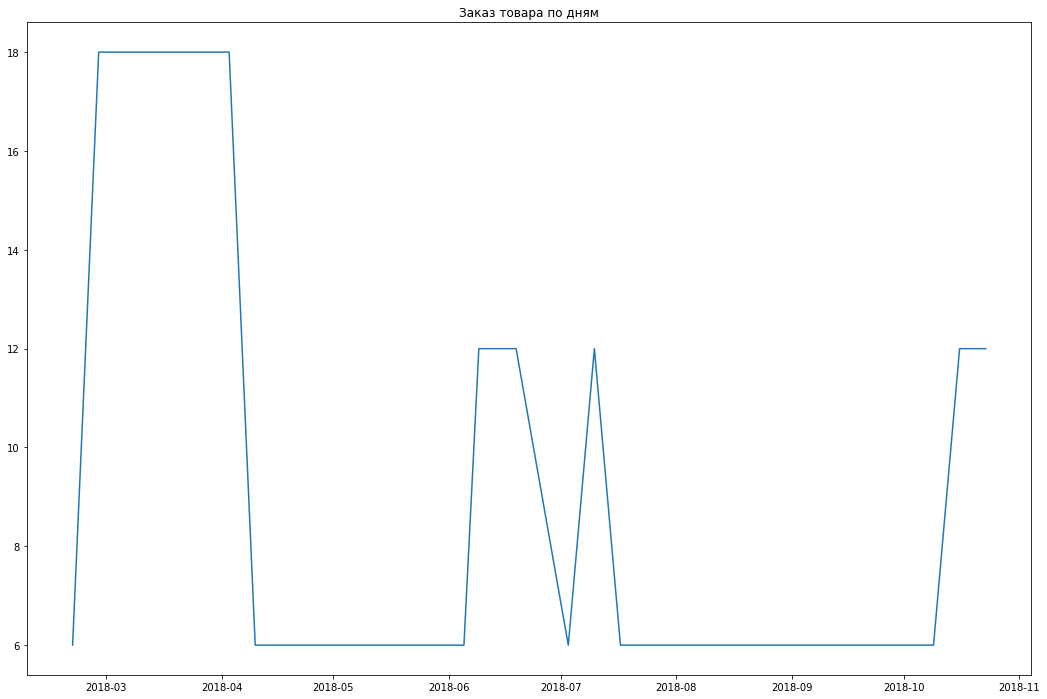

In [98]:
rcParams["figure.figsize"] = 18, 12

plt.plot(df.index, df['ЗКЗ_ИТГ_ШТ'])
plt.title("Заказ товара по дням")
plt.show()

In [99]:
df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,НеделяЗаказа,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ
ДатаЗаказа,,,,,,,,,,,,,
2018-02-20,8,67.85,245,0.0,0.0,0.0,0,0.00000,7,6.0,0.0,0.0,6.0
2018-02-27,9,67.85,245,1.0,0.0,0.8,1,7.60762,7,6.0,5.0,0.0,18.0
2018-03-06,10,67.85,245,0.0,0.0,0.8,1,7.65574,7,6.0,1.0,0.0,18.0
2018-03-13,11,67.85,245,0.0,0.0,0.8,1,7.66856,7,6.0,0.0,0.0,18.0
2018-03-20,12,67.85,245,0.0,0.0,0.8,1,6.74449,7,6.0,0.0,0.0,18.0


Посмотрите, какие предикторы коррелируют с игреком, а какие нет. Оставить, которые коррелируют. Также уберите те предикторы, которые коррелируют c теми, что в модель включены. 

In [100]:
y = df.iloc[:,-1].values
y

array([ 6., 18., 18., 18., 18., 18., 18.,  6.,  6.,  6.,  6.,  6.,  6.,
        6., 12., 12.,  6., 12.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6., 12., 12.])

In [101]:
np.corrcoef(df['ЦЕНА_ЗКП_РУБ'].values, y)

array([[1.        , 0.04859461],
       [0.04859461, 1.        ]])

In [102]:
np.corrcoef(df['СРОК_ГДН_ОСТ_Д'].values, y)

C:\Users\sych_\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\sych_\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

In [103]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, y)

array([[ 1.        , -0.68908085],
       [-0.68908085,  1.        ]])

In [104]:
np.corrcoef(df['ПРДЖ_СР_ШТ_ДО'].values, y)

array([[1.        , 0.17965722],
       [0.17965722, 1.        ]])

In [105]:
np.corrcoef(df['КВО_ПРДЖ_БАЗА_ШТ'].values, y)

array([[ 1.        , -0.59368907],
       [-0.59368907,  1.        ]])

In [106]:
np.corrcoef(df['ПРДЖ_БАЗА_СР_ШТ'].values, y)

array([[1.        , 0.37378677],
       [0.37378677, 1.        ]])

In [107]:
np.corrcoef(df['ППП_ДЛН_Д'].values, y)

array([[ 1.        , -0.12566762],
       [-0.12566762,  1.        ]])

In [109]:
np.corrcoef(df['ТРБ_МАГ_КВНТ_ШТ'].values, y)

array([[nan, nan],
       [nan,  1.]])

In [110]:
np.corrcoef(df['ПРДЖ_ШТ_НЕД'].values, y)

array([[ 1.        , -0.34363222],
       [-0.34363222,  1.        ]])

In [111]:
np.corrcoef(df['СПИС_ШТ_НЕД'].values, y)

array([[nan, nan],
       [nan,  1.]])

С y коррелируют более 0,5 следующие предикторы: ОСТ_ТЕК_ШТ, ПРДЖ_СР_ШТ_ДО, ПРДЖ_БАЗА_СР_ШТ, ТРБ_МАГ_КВНТ_ШТ.
    Посмотрим, как эти предикторы коррелируют между собой

In [76]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ПРДЖ_СР_ШТ_ДО'].values)

array([[1.        , 0.74569248],
       [0.74569248, 1.        ]])

In [77]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ПРДЖ_БАЗА_СР_ШТ'].values)

array([[1.        , 0.78950262],
       [0.78950262, 1.        ]])

In [78]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ТРБ_МАГ_КВНТ_ШТ'].values)

array([[ 1.        , -0.21671163],
       [-0.21671163,  1.        ]])

In [79]:
y.shape

(63,)

In [82]:
y = y.reshape(df.shape[0], 1)
y

array([[ 1.],
       [ 9.],
       [ 7.],
       [11.],
       [42.],
       [11.],
       [31.],
       [36.],
       [ 1.],
       [33.],
       [ 6.],
       [ 6.],
       [20.],
       [ 6.],
       [10.],
       [10.],
       [20.],
       [10.],
       [10.],
       [10.],
       [10.],
       [20.],
       [10.],
       [20.],
       [10.],
       [10.],
       [10.],
       [10.],
       [20.],
       [20.],
       [10.],
       [10.],
       [20.],
       [10.],
       [10.],
       [20.],
       [10.],
       [20.],
       [20.],
       [10.],
       [20.],
       [20.],
       [20.],
       [20.],
       [10.],
       [20.],
       [20.],
       [10.],
       [20.],
       [20.],
       [10.],
       [10.],
       [10.],
       [10.],
       [40.],
       [40.],
       [60.],
       [40.],
       [20.],
       [30.],
       [20.],
       [20.],
       [20.]])

In [83]:
y.shape

(63, 1)

In [86]:
#X = df.loc[:,['ПРДЖ_СР_ШТ_ДО', 'ТРБ_МАГ_КВНТ_ШТ']].values
X = df.loc[:, df.columns != 'ЗКЗ_ИТГ_ШТ'].values
X

array([[ 3.5000000e+01,  2.3000000e+01,  4.5000000e+01,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.5000000e+01,  2.3000000e+01,  4.5000000e+01,  1.3500000e+01,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  2.0930000e+01,
         3.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.5000000e+01,  2.3000000e+01,  4.5000000e+01,  1.9800000e+01,
         0.0000000e+00,  9.1653300e+00,  0.0000000e+00,  4.3400000e+01,
         2.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.6000000e+01,  1.7000000e+01,  4.5000000e+01,  4.1300000e+01,
         0.0000000e+00,  8.8044000e+00,  1.0000000e+00,  6.6459560e+01,
         2.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.6000000e+01,  1.7000000e+01,  4.5000000e+01,  2.2400000e+01,
         0.0000000e+00,  8.9838500e+00,  1.0000000e+00,  7.1

In [87]:
X.shape

(63, 12)

In [88]:
X = np.hstack([np.ones((df.shape[0], 1)), X])
X

array([[ 1.0000000e+00,  3.5000000e+01,  2.3000000e+01,  4.5000000e+01,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.0000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00],
       [ 1.0000000e+00,  3.5000000e+01,  2.3000000e+01,  4.5000000e+01,
         1.3500000e+01,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.0930000e+01,  3.0000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00],
       [ 1.0000000e+00,  3.5000000e+01,  2.3000000e+01,  4.5000000e+01,
         1.9800000e+01,  0.0000000e+00,  9.1653300e+00,  0.0000000e+00,
         4.3400000e+01,  2.0000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00],
       [ 1.0000000e+00,  3.6000000e+01,  1.7000000e+01,  4.5000000e+01,
         4.1300000e+01,  0.0000000e+00,  8.8044000e+00,  1.0000000e+00,
         6.6459560e+01,  2.0000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00],
       [ 1.0000000e+00,  3.6000000e+

In [89]:
X.shape

(63, 13)

In [90]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[-3.89395033e+02],
       [ 1.66329988e+00],
       [-4.49843795e-01],
       [ 8.43150986e+00],
       [-6.30821472e-01],
       [-4.89788819e-01],
       [ 7.04815546e-01],
       [-4.25951054e+00],
       [ 4.64715932e-01],
       [ 6.04277824e+00],
       [ 1.96351116e+00],
       [-1.03332208e-01],
       [ 2.61406079e-01]])

In [91]:
B.shape

(13, 1)

In [92]:
df2 = pd.DataFrame(data=y, columns=['y'])
df2['y_hat'] = np.dot(X, B)
df2.head(20)

,y,y_hat
0,1.0,51.941067
1,9.0,59.194260
2,7.0,66.079340
3,11.0,63.081287
4,42.0,83.325188
5,11.0,69.758640
6,31.0,79.473368
7,36.0,80.465995
8,1.0,62.157197
9,33.0,76.325921


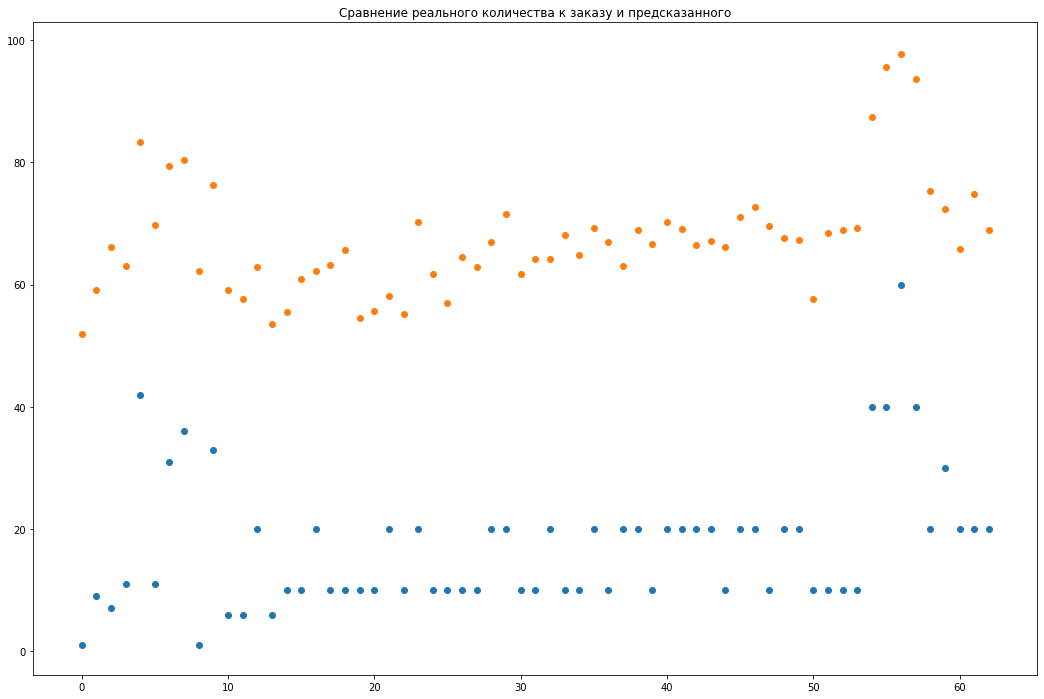

In [93]:
rcParams["figure.figsize"] = 18, 12

plt.scatter(df2.index, df2['y'])
plt.scatter(df2.index, df2['y_hat'])
plt.title("Сравнение реального количества к заказу и предсказанного")
plt.show()

In [43]:
mse = ((y-np.dot(X, B))**2).sum()/659803
mse

218.73010407551692

In [44]:
A_mean = 100 * np.mean(np.abs((y - np.dot(X, B)) / y))
A_mean

58.16637593750193

Проверим, является ли полученная модель статистически значимой с помощью критерия Фишера. Установим уровень значимости альфа = 0,05. 
* 1) H0: модель не является статистически значимой
* 2) H1: модель является статистически значимой

In [21]:
n = 659803
p = 17
alpha = 0.05

In [22]:
df1 = p - 1
df1

16

In [23]:
df2 = n - p
df2

659786

In [25]:
SSf = ((np.dot(X, B) - y.mean())**2).sum()
SSf

880105113.1265177

In [26]:
SSo = ((y-np.dot(X, B))**2).sum()
SSo

138238565.96820495

In [27]:
MSf = SSf / df1
MSf

55006569.57040735

In [28]:
MSo = SSo / df2
MSo

209.5203080517091

In [29]:
Fp = MSf / MSo
Fp

262535.74215265026

In [ ]:
Ft = 1.75

Fp > Ft модель является статистически значимой на уровне значимости альфа = 0,05

In [31]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [30]:
import pylab
import matplotlib.dates
from pylab import rcParams


import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image, display, HTML

In [32]:
df = pd.read_csv('Order1c_pred.csv')

In [46]:
def plot_up_to(year, goods):   
    result = df.query(f'(КодТовара == "{goods}") & (ГодЗаказа == "{year}")')
    xdata = result['НеделяЗаказа']
    ydata = result['ЗКЗ_ИТГ_ШТ']
    rcParams["figure.figsize"] = 10, 8

    plt.scatter(xdata,ydata)
    plt.title('Количество к заказу товара по неделям')
    plt.show()

_ = interact(plot_up_to, year=widgets.Dropdown(options=list(df["ГодЗаказа"].unique()), value=2018, description='Год заказа:'), 
             goods=widgets.Dropdown(options=list(df["КодТовара"].unique()), description='Код товара:'))

interactive(children=(Dropdown(description='Год заказа:', options=(2018, 2016, 2017, 2015), value=2018), Dropd…